<a href="https://colab.research.google.com/github/mgoetze06/fotobooth/blob/main/fotobox-cvml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#face_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_frontalface_alt2.xml')
face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


(2592, 3888, 3)
(648, 972, 3)


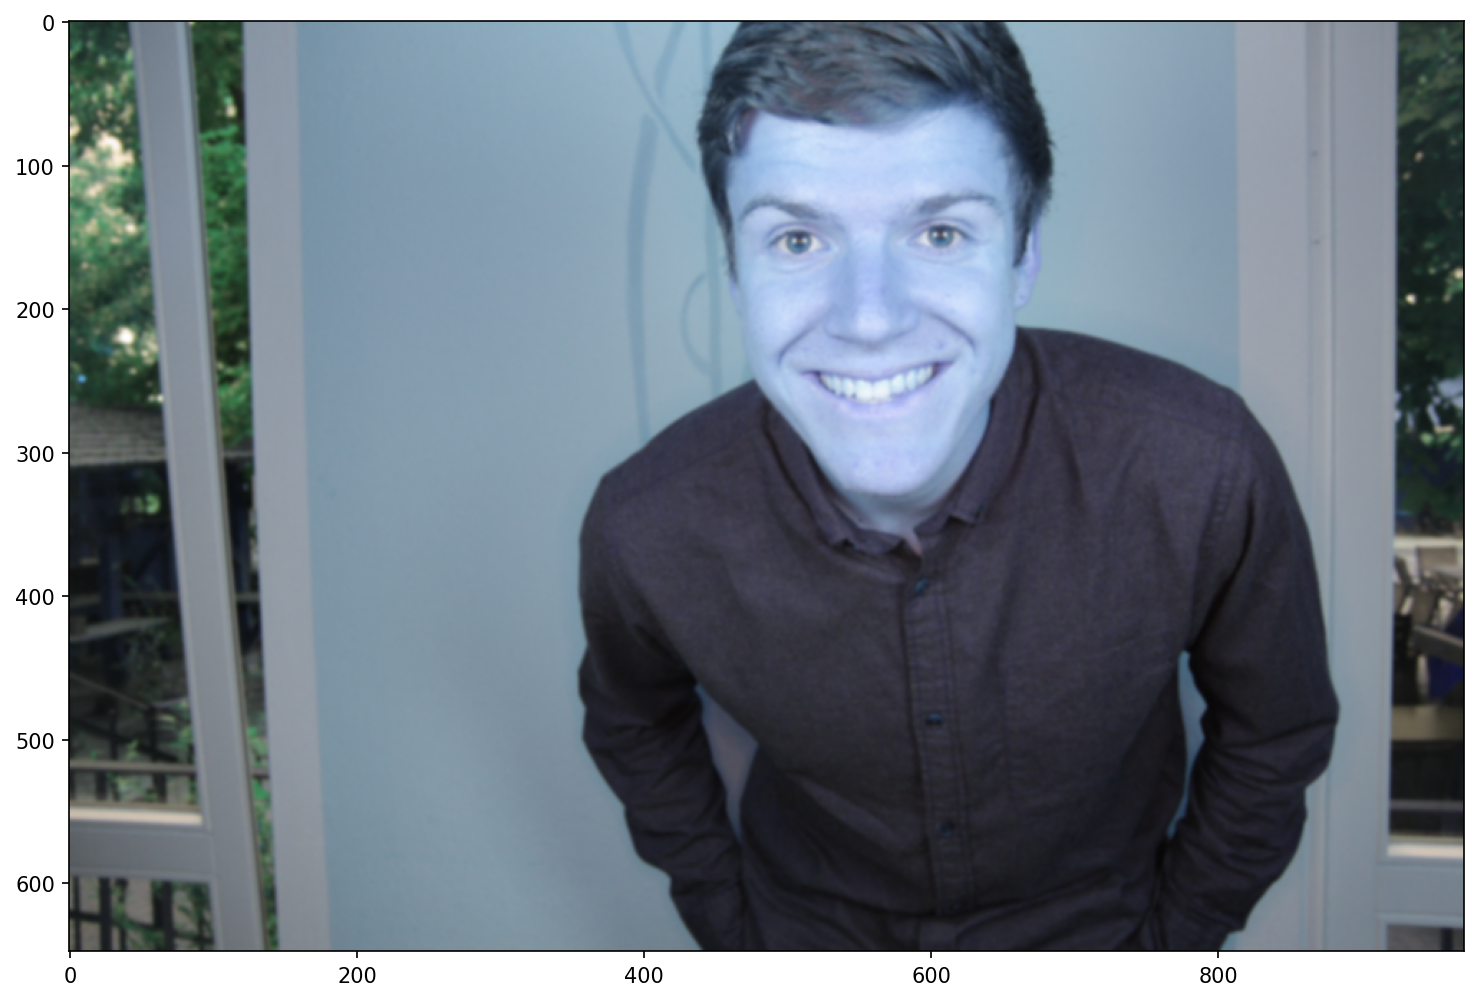

In [81]:
#cap = cv2.VideoCapture(0)
#img = cv2.imread('/content/drive/MyDrive/test.JPG', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('/content/drive/MyDrive/test.JPG')
h,w,temp = img.shape
print(img.shape)
reduce_factor = 4
img = cv2.resize(img, (int(w/reduce_factor), int(h/reduce_factor)))
img = cv2.GaussianBlur(img, (5,5), 0)
#img = cv2.imread('/path_to_image/opencv-logo.png', 0) 
#cv2.imshow('image',img) not available in jupyter
#plt.imshow(img, cmap='gray')
plt.figure(figsize=(12, 10), dpi=150)
plt.imshow(img)
print(img.shape)

In [82]:
#success, img = cap.read()
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#face_boxes = face_cas.detectMultiScale(im_gray, scaleFactor=1.05, minNeighbors=9)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=9, outputRejectLevels=True)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.2, minNeighbors=9, outputRejectLevels=True)
face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.2, minNeighbors=12, outputRejectLevels=True)
print(face_boxes)
print(rejectLevels)
print(levelWeights)

[[440  57 237 237]]
[[25]]
[[7.74309307]]


True

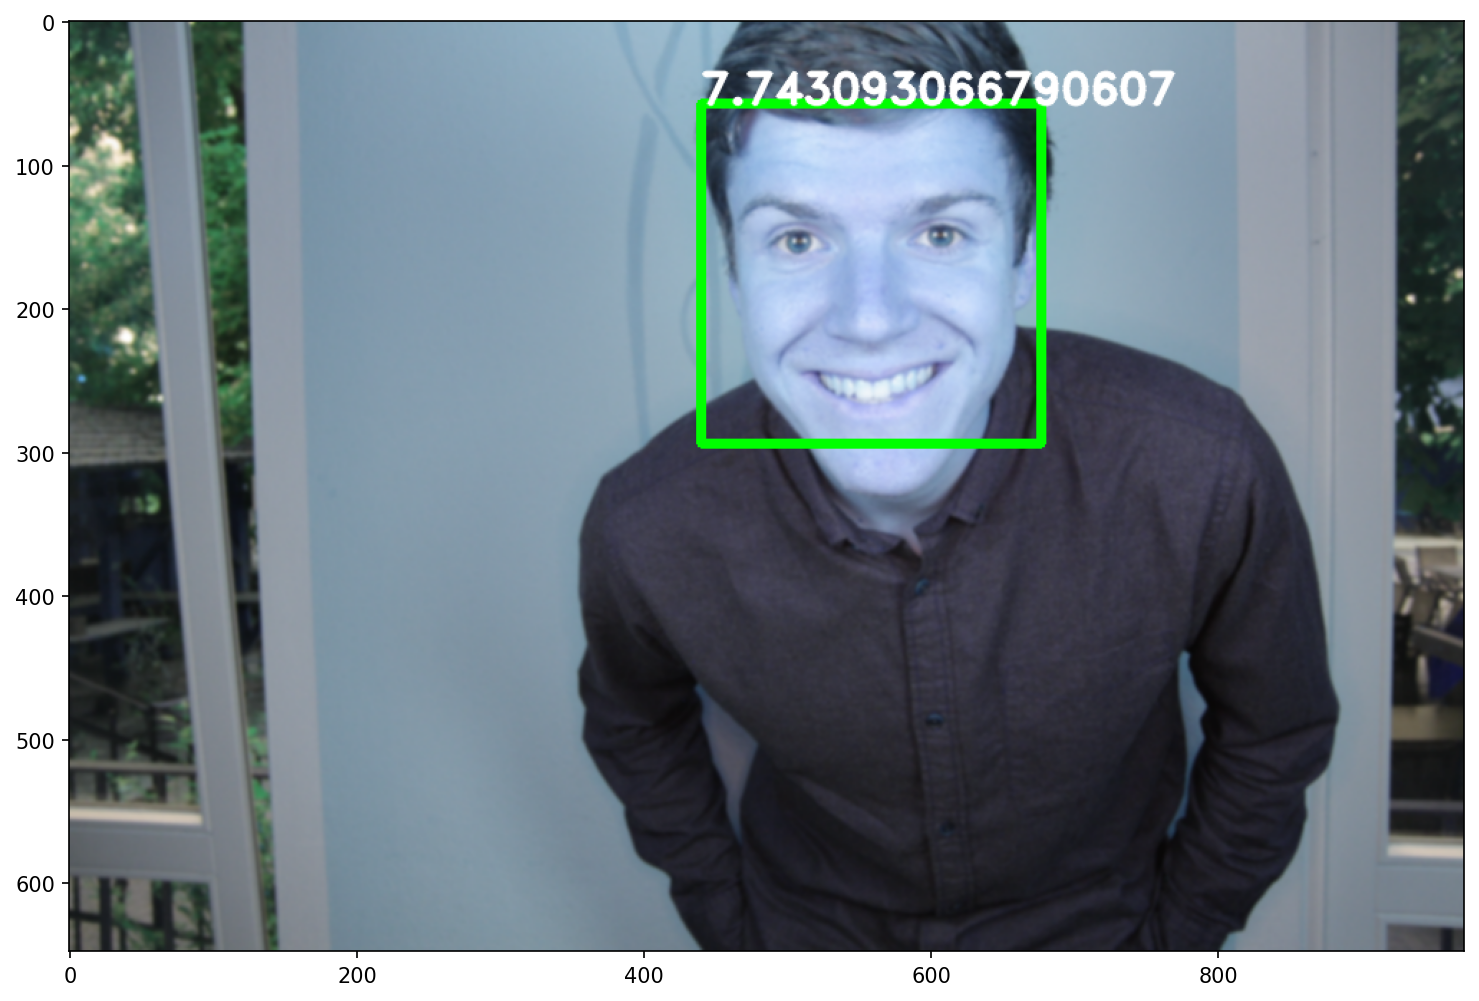

In [84]:
i = 0
for (x, y, w, h) in face_boxes:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
  cv2.putText(img,str(levelWeights[i][0]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
  i = i + 1
plt.figure(figsize=(12, 10), dpi=150)
plt.imshow(img, cmap='gray')
cv2.imwrite("face_detected.jpg", img)
#plt.savefig('test_detected.jpg')
#cv2.imshow('Output', img)
#cap.release()
#cv2.destroyAllWindows()